In [195]:
import geopandas as gpd
import osmnx as ox
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path=r"Y:\RECHERCHE ET DEV\10_Modèle d'attractivite des rues\04_données clients (source)\osm\paris"

In [136]:
buildings=pickle.load(open(path+r'\building_level_filled.pkl','rb')).to_crs('EPSG:3857')


In [137]:
contour_iris=gpd.read_file(r'Y:\REFERENTIEL DATA\RP 2022 FRANCE\CARTOGRAPHIE\Cartographie_France_IRIS_2019\CONTOURS-IRIS_2-1_SHP_LAMB93_FXX-2019\CONTOURS-IRIS.shp').to_crs('EPSG:3857')

In [138]:
iris_data=pd.read_excel('Y:\REFERENTIEL DATA\RP 2022 FRANCE\GEODATA - IRIS\Geodata_IRIS_essentiels.xlsx')

In [139]:
#get iris of a building
def get_iris(building_ID,contour_iris,iris_data,buildings,display=True):

    
    mask=contour_iris.intersects(buildings.loc[building_ID]['geometry']).to_numpy()
    if display:
        fig,ax=plt.subplots()
        contour_iris[mask].plot(ax=ax)
        buildings.loc[[building_ID]].plot(ax=ax,color="red")
        plt.show()

    return iris_data.loc[contour_iris[mask]['CODE_IRIS'].values]
    

In [1]:
#get all buildings in a iris_id 
def get_buildings_iris(iris_id,contour_iris=None,iris_data=None,buildings=None,display=True):

    if not contour_iris:
        contour_iris=gpd.read_file(r'Y:\REFERENTIEL DATA\RP 2022 FRANCE\CARTOGRAPHIE\Cartographie_France_IRIS_2019\CONTOURS-IRIS_2-1_SHP_LAMB93_FXX-2019\CONTOURS-IRIS.shp').to_crs('EPSG:3857')
    if not iris_data:
        iris_data=pd.read_excel('Y:\REFERENTIEL DATA\RP 2022 FRANCE\GEODATA - IRIS\Geodata_IRIS_essentiels.xlsx')
    if not buildings:
        buildings=pickle.load(open(path+r'\building_level_filled.pkl','rb')).to_crs('EPSG:3857')

    mask=buildings.intersects(contour_iris[contour_iris["CODE_IRIS"]==iris_id].iloc[0]['geometry']).to_numpy()
    if display and mask.any():
        fig,ax=plt.subplots()
        contour_iris[contour_iris["CODE_IRIS"]==iris_id].plot(ax=ax)
        buildings[mask].plot(ax=ax,color="#71DAFF")
        plt.show()
    return buildings[mask]

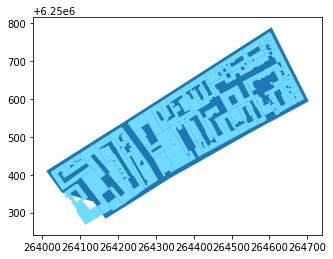

In [228]:
buildings_11=get_buildings_iris("751114314",contour_iris,iris_data,buildings)

# test

In [119]:
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Diametrix\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


element_type  osmid   
way           63637860    15.0
              63637876     9.0
              63638129    15.0
              63638138    18.0
              63638192     3.0
                          ... 
relation      1606524     18.0
              1606526     21.0
              1606527     18.0
              1606528     15.0
              1607780     18.0
Name: height, Length: 73, dtype: float64


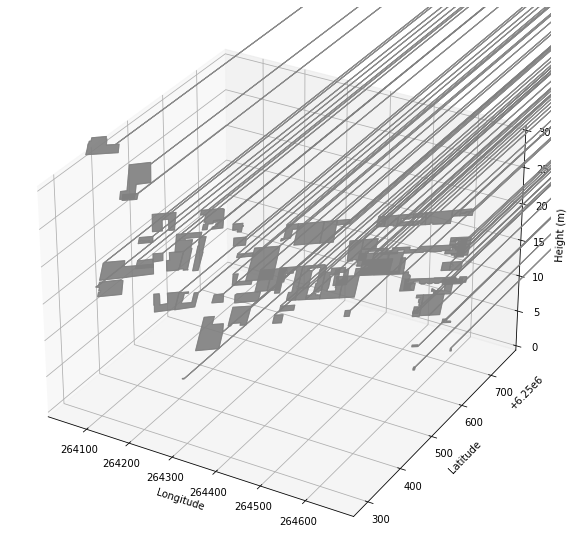

In [253]:
buildings_11=get_buildings_iris("751114314",contour_iris,iris_data,buildings,False)
buildings_11['height'] = buildings_11['building:levels'].astype(float) * 3.0 # assuming 3 meters per level
minx=buildings_11.total_bounds[0]
miny=buildings_11.total_bounds[1]
maxx=buildings_11.total_bounds[2]
maxy=buildings_11.total_bounds[3]
# create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
print(buildings_11.height)
# iterate over the building polygons and plot them as 3D polygons
for i, buildings_11 in buildings_11.iterrows():

    x,y = buildings_11.geometry.exterior.coords.xy

    z = [0] * len(x)
    ax.add_collection3d(
        plt.fill_between(x, y, z, color='gray', alpha=0.7),
        zs=buildings_11.height,
        zdir='z'
    )

# set the axis labels and limits
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height (m)')
ax.set_xlim([minx, maxx])
ax.set_ylim([miny, maxy])
ax.set_zlim([0, 30])

# show the plot
plt.show()

In [246]:
buildings_11['height']

15.0